## Recomender System

In [148]:
import numpy as np
from tests_and_graphing import cosine_similarity
import matplotlib.pyplot as plt

In [149]:
def delta(A):
    # Gives a uniform mean vector for each row
    Delta = []
    for row in A: Delta.append(np.full(row.shape, np.mean(row)))
    return Delta


[[ 29.42857143 -13.71428571  11.14285714 -17.42857143   0.57142857
    3.57142857  -5.71428571]
 [-13.71428571  22.85714286 -12.57142857   5.71428571   5.71428571
   -6.28571429  22.85714286]
 [ 11.14285714 -12.57142857  21.71428571 -23.14285714  -6.14285714
    3.85714286  -3.57142857]
 [-17.42857143   5.71428571 -23.14285714  33.42857143   1.42857143
   -5.57142857  -9.28571429]
 [  0.57142857   5.71428571  -6.14285714   1.42857143   7.42857143
    6.42857143   5.71428571]
 [  3.57142857  -6.28571429   3.85714286  -5.57142857   6.42857143
   29.42857143  -2.28571429]
 [ -5.71428571  22.85714286  -3.57142857  -9.28571429   5.71428571
   -2.28571429  34.85714286]]
[[ 1.         -0.64929208  0.98290515 -0.79197053 -0.51501423  0.99856309
  -0.18986515]
 [-0.64929208  1.         -0.49816767  0.04986594  0.98631484 -0.68911551
   0.86998301]
 [ 0.98290515 -0.49816767  1.         -0.8908436  -0.34839218  0.97162642
  -0.00585578]
 [-0.79197053  0.04986594 -0.8908436   1.         -0.1154841

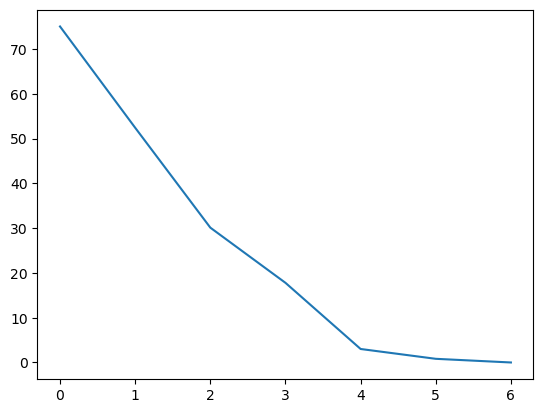

In [ ]:
Alice =     [0,4,4,0,0,5,3]
Bob =       [5,5,5,5,5,1,1]
Charley =   [0,2,3,4,0,3,5]
Doug =      [5,0,0,0,5,2,0]
Evan =      [1,3,0,0,1,0,0]
Faye =      [3,4,0,0,0,0,5]
Garret =    [4,5,5,5,1,0,0]


Ratings = np.array([Alice,Bob, Charley, Doug, Evan, Faye, Garret])

Recentered = Ratings - delta(Ratings)

Covariance = Recentered @ Recentered.T # (Users by Movies) * (Movies by Users) = Users by Users
print(Covariance)
_, s, _ = np.linalg.svd(Covariance)
plt.plot(s)


CM = cosine_similarity(Covariance, 2)

print(CM)





In [151]:
INDEX = [] # global reordering index
CM_COPY = CM.copy()
indices = list(range(0,CM.shape[1]))
while(len(indices) > 1):
    # sort by cosine similarity
    similarity_list = CM_COPY[0,:]
    new_indices = np.argsort(similarity_list)[::-1]
    
    # rearrange matrix
    indices = [indices[i] for i in new_indices]
    CM_COPY = CM_COPY[np.ix_(new_indices,new_indices)]

    # remove and update
    INDEX.append(indices[0])
    indices.pop(0)
    CM_COPY = CM_COPY[1:,1:]
INDEX.append(indices[0])
del CM_COPY
print(INDEX)
CM_REORDERED = CM[np.ix_(INDEX, INDEX)]
CM_REORDERED


[0, 5, 2, 6, 4, 1, 3]


array([[ 1.        ,  0.99856309,  0.98290515, -0.18986515, -0.51501423,
        -0.64929208, -0.79197053],
       [ 0.99856309,  1.        ,  0.97162642, -0.24220639, -0.56020956,
        -0.68911551, -0.75811338],
       [ 0.98290515,  0.97162642,  1.        , -0.00585578, -0.34839218,
        -0.49816767, -0.8908436 ],
       [-0.18986515, -0.24220639, -0.00585578,  1.        ,  0.9393729 ,
         0.86998301, -0.44908575],
       [-0.51501423, -0.56020956, -0.34839218,  0.9393729 ,  1.        ,
         0.98631484, -0.11548413],
       [-0.64929208, -0.68911551, -0.49816767,  0.86998301,  0.98631484,
         1.        ,  0.04986594],
       [-0.79197053, -0.75811338, -0.8908436 , -0.44908575, -0.11548413,
         0.04986594,  1.        ]])

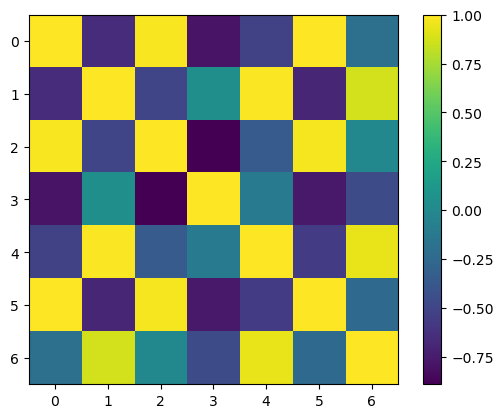

In [152]:
import matplotlib.pyplot as plt

plt.imshow(CM, cmap='viridis')
plt.colorbar()
plt.show()

# What We Have

We now have a matrix that accurately shows the cosine similarity between pairs of people.

# What This Means

Look at the first row: This shows Alice. It appears that she is most similar with Charley and Faye. So excluding the movies that Alice and Charley have both seen, we can note that Alice would probably like the 4th movie. The implementation of this is easy, we just take boolean vectors of movies seen by alice and charley, and we find the movies that alice hasn't seen but charley has, if it has a good rating then it's recommended to Alice.

# We can try the whole procedure again with Movie Covariance wrt Users this time.



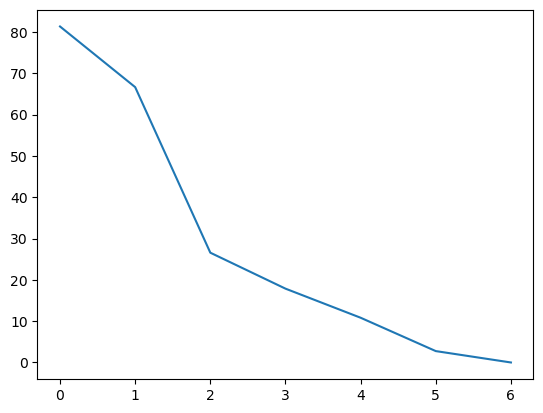

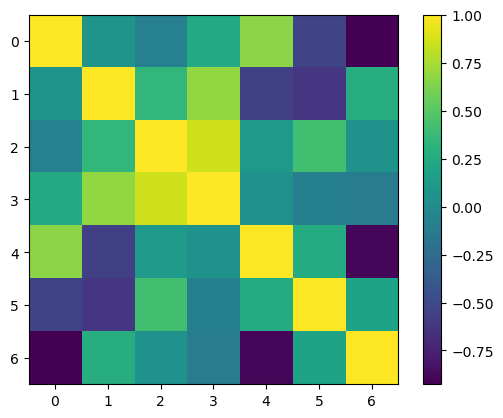

In [153]:
#Covariance = Recentered.T @ Recentered

Movies_Recentered = Ratings.T - delta(Ratings.T)

Movies_Covariance = Movies_Recentered @ Movies_Recentered.T

_, s, _ = np.linalg.svd(Movies_Covariance)
plt.plot(s)
plt.show()
Movies_CM = cosine_similarity(Movies_Covariance, 3)

import matplotlib.pyplot as plt

plt.imshow(Movies_CM, cmap='viridis')
plt.colorbar()
plt.show()

[0, 4, 5, 2, 3, 1, 6]


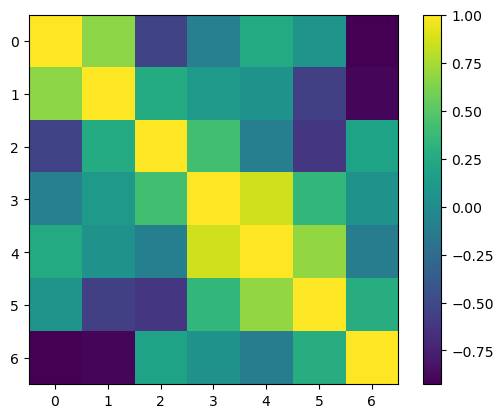

In [154]:

INDEX = [] # global reordering index
CM_COPY = Movies_CM.copy()
indices = list(range(0,Movies_CM.shape[1]))
while(len(indices) > 1):
    # sort by cosine similarity
    similarity_list = CM_COPY[0,:]
    new_indices = np.argsort(similarity_list)[::-1]
    
    # rearrange matrix
    indices = [indices[i] for i in new_indices]
    CM_COPY = CM_COPY[np.ix_(new_indices,new_indices)]

    # remove and update
    INDEX.append(indices[0])
    indices.pop(0)
    CM_COPY = CM_COPY[1:,1:]
INDEX.append(indices[0])
del CM_COPY
print(INDEX)
CM_REORDERED = Movies_CM[np.ix_(INDEX, INDEX)]
CM_REORDERED

plt.imshow(CM_REORDERED, cmap='viridis')
plt.colorbar()
plt.show()

# What this is showing

The second third and fourth movies are very strongly connected. I actually intended for that to happen because when I was writing this on paper those were associated with the lord of the rings trilogy